In [ ]:
#! pip install -r requirements.txt

### Regresion


In [44]:
import pandas as pd
import sklearn
sklearn.__version__
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_csv('salaries_experience.csv')
df.head(10)

In [ ]:
#modelado (predecir algo)
#aprendizaje supervisado
#Datos entrada 'X'
#Datos de salida 'y'
#Algoritmo aprenda los datos 'y' la relacion entre la entrada 'x' con cada salida 'y'
#si el algoritmo aprende luego puede predecir nuevas salidas 'y' ante nuevas entradas 'x'

* Primer paso separar la 'X' y la 'y'

In [ ]:
X = df[['YearsExperience']] #doble corchete para que sea un dataframe
# type(X) es un dataframe
X[:5]

In [ ]:
y = df['Salary'] #variable que queremos modelar, predecir, puede ser una serio o un array de numpy de una dimension
y[:5]

Instanciar el algoritmo de regresion lineal

In [11]:
#from sklearn.linear_model import LinearRegression

model = LinearRegression() #crear un objeto

Entrenar el algoritmo

In [ ]:
model.fit(X, y)
print('intercepto (w0/ b0): ', model.intercept_) #donde intercepta el eje y cuando x es 0
print('coeficiente (w1/b1): ', model.coef_)

Realizar la prediccion

In [ ]:
X_new = pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience'])
X_new

In [18]:
X_new['Salary_pred'] = model.predict(X_new)


In [ ]:
X_new

In [ ]:
#explicacion de lo que hace arriba el predict()
experience_years = 5.78
salary = model.intercept_ + model.coef_ * experience_years
salary

In [ ]:
print(model.predict([[5.78]])) # Aquí le pasamos una nueva X
print(model.predict([[9.77], [2.77]]))

In [46]:
# para evitar el warning lo ideal es pasarle un DataFrame con las mismas columnas con el que se entrenó
# pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience'])
model.predict(pd.DataFrame([5.78, 2.43, 9.77], columns=['YearsExperience']))

array([ 80412.98241668,  48755.6086398 , 118118.33207928])

In [ ]:
y_pred = model.predict(X)
y_pred

In [37]:
df['Salary_pred'] = model.predict(X)
df.head()

,YearsExperience,Salary,Salary_pred
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


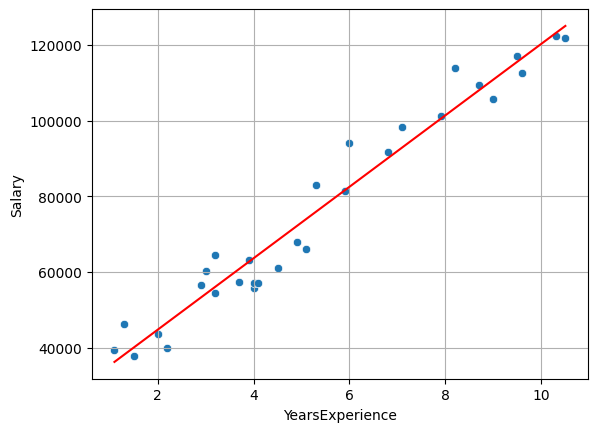

In [34]:
#plt.scatter(df['YearsExperience'], df['Salary'])
sns.scatterplot(df, x='YearsExperience', y='Salary')
sns.lineplot(df, x='YearsExperience', y='Salary_pred', c='r')
plt.grid()

Error absoluto medio: hay un error de 4600 € en las predicciones de media

In [41]:
#from sklearn.metrics import mean_absolute_error
# cuanto mas cercano a 0 mejor, porque indica que hay menos error
#cualquiera de las dos opciones da el mismo valor

#mean_absolute_error(y, y_pred)


mean_absolute_error(df['Salary'], df['Salary_pred'])

4644.2012894435375

Raiz error cuadratico medio: RMSE (Root mean squared error)

In [45]:
#penaliza predicciones que tengan un error muy grande, si pr ejemplo el modelo se ha 
#equivocado en dos o tres predicciones las penaliza mas que la mae(mean absolute error)
root_mean_squared_error(y, y_pred)

5592.043608760662

Calidad global: que tan bien el modelo explica la variabilidad de los datos

In [43]:
# de 0 a 1, cuanto mas cercano al 1 mejor
r2_score(y, y_pred)

0.9569566641435086

Regresion lineal multiple: utiliza varios datos de entrada X, por ejemplo varias columnas